In [1]:
#Dependencias
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import scipy.stats as st

In [2]:
#Carregar dados
cloud_file = "dados/goamazon-radiometro/danilo-allclouds.csv"
raw = pd.read_csv(cloud_file)

In [3]:
def filter_invalid_ind(raw):
    return (raw > 0) & (raw < 1)

def filter_invalid_inds(raw1, raw2):
    return filter_invalid_ind(raw1) & filter_invalid_ind(raw2)

def compare(raw1, raw2, label1="a", label2="a", title="", bins=30):
    inds = filter_invalid_inds(raw1, raw2)
    dat1 = raw1[inds]
    dat2 = raw2[inds]
    plt.hist2d(x=dat1, y=dat2, bins=bins)
    plt.xlabel(label1)
    plt.ylabel(label2)
    plt.title = title
    plt.colorbar()
    (ang_coef, lin_coef, r, p, s) = st.linregress(x=dat1, y=dat2)
    x = np.linspace(0, 1, int(1e2))
    y = ang_coef * x + lin_coef
    plt.plot(x, y, '-r')
    plt.show()
    print("y = %.2f * x + %.2f" % (ang_coef, lin_coef))
    print("r = %.2f, p = %.2f, s = %.2f" % (r, p, s))

In [42]:
raw.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'hour', 'min', 'CosZ', 'cfsirs', 'codsirs', 'cfXL', 'codXL', 'cfopaquetsky', 'cfthintsky', 'cftottsky', 'cbase', 'ctop', 'cldthick', 'Tair', 'RH', 'Wspd', 'Wdir', 'times'], dtype='object')

In [4]:
#Filtrar
cf = raw.cfsirs
inds = (cf >= 0)
cf = cf[inds]
tempo = raw.times[inds]
tempo = tempo / (60*60*24)

In [47]:
compare(raw.cftottsky, raw.cfXL, label1="TSKY", label2="XL", bins=15)

<IPython.core.display.Javascript object>

y = 0.42 * x + 0.48
r = 0.51, p = 0.00, s = 0.00


<IPython.core.display.Javascript object>


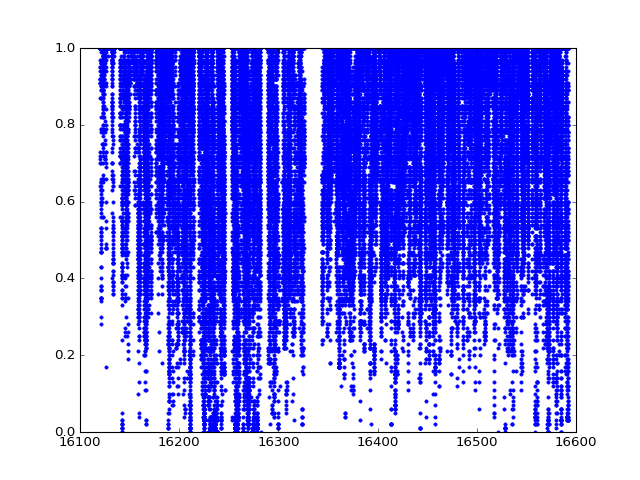

In [7]:
plt.plot(tempo, cf, '.')
plt.show()